In [1]:
using DelimitedFiles
using Optim
using Statistics
using Plots

In [2]:
include("../src/bispectrum_multipoles.jl")
include("../src/TreeLevelBispectrum.jl")
include("../src/utils.jl")

kkk_grid

In [3]:
function smooth_pk(k, keq, ns, A)
    q = k./keq
    L = log.(2*exp(1) .+ 1.8.*q)
    C =  14.2 .+ 731 ./(1 .+ 62.5.*q)
    T = L./(L .+ C.*q.^2)
    Pk = k.^ns.*T.^2
    return A.*Pk
end

smooth_pk (generic function with 1 method)

In [9]:
function smooth_bk(k123, keq, ns, A, f, b1, b2, SN1, SN2)
    pk(k) = smooth_pk(k, keq, ns, A) 
    N = size(k123)[2]
    B00smooth = zeros(N)
    for i in 1:N
        B00smooth[i] = B00(k123[1,i], k123[2,i], k123[3,i], b1, b2, f, pk, tree_level_bk) + SN1 + (pk(k123[1,i])+pk(k123[2,i])+pk(k123[3,i]))*SN2
    end
    return B00smooth
end


smooth_bk (generic function with 1 method)

In [5]:

bf_bk_smooth(x) = sum((bkmean .- smooth_bk(k123, x[1], x[2], x[3], x[4], x[5], x[6])).^2 .*k123[1,:].*k123[2,:].*k123[3,:])

bf_bk_smooth (generic function with 1 method)

In [6]:
bkall = zeros(25,2600)
cc = 1
for ff in readdir("../data/")
    if ff[1:2] == "bk"
        bkall[cc,:] = readdlm(string("../data/",ff))[:,4]
        cc += 1
    end
end
bkmean = mean(bkall, dims=1)

1×2600 Matrix{Float64}:
 -63723.5  1.42473e5  4.60028e5  …  2439.11  2363.36  2295.55  2199.11

In [7]:
k123 = kkk_grid(0.005, 0.01, 30)

3×2600 Matrix{Float64}:
 0.005  0.005  0.005  0.005  0.005  …  0.275  0.285  0.285  0.285  0.295
 0.005  0.015  0.025  0.035  0.045     0.295  0.285  0.285  0.295  0.295
 0.005  0.015  0.025  0.035  0.045     0.295  0.285  0.295  0.295  0.295

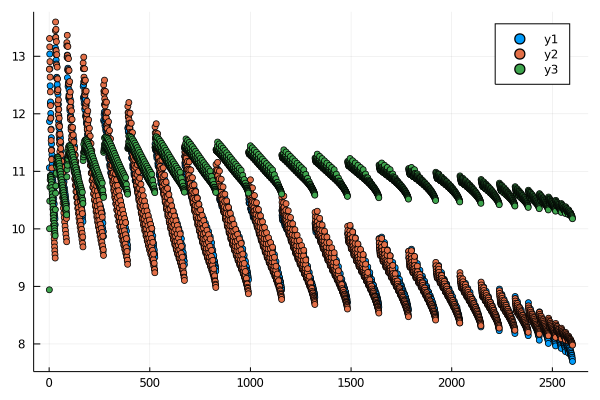

In [14]:
scatter((log.(abs.(bkmean'))))
scatter!((log.(abs.(smooth_bk(k123, 0.15, 0.96, 9e3, 2.5, 2, 0.5, 2e3, 0)))))
scatter!((log.(abs.(smooth_bk(k123, 0.40, 1.35, 2808.98, 2.39, 2.14, 1.06, 1223.48, 881.83)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.12, 0.96, 9e3, 2.5, 2, 2, 5e3, 0)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.18, 0.96, 9e3, -1, 1, 1, 1e3, 0)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.18, 0.96, 9e3, -1.5, 1, 1, 1e3, 0)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.18, 0.96, 4e3, 1, 2, 2, 1e3, 0)))))

In [223]:
bk_bf = optimize(bf_bk_smooth, [0.15, 0.96, 9e3, 2.5, 2, 0.5, 2e3, 1e3], Optim.Options(iterations=100))

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     9.025752e+13

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   2230  (vs limit Inf)
    Iterations:    100
    f(x) calls:    167


In [224]:
mm = Optim.minimizer(bk_bf)

8-element Array{Float64,1}:
    0.4042299662947554
    1.3516878905679395
 2808.9835151082234
    2.3891732084650616
    2.14068577808975
    1.0608936136913694
 1223.481285057175
  881.8306658186516

In [13]:
sbk1 = smooth_bk(k123, 0.15, 0.96, 9e3, 2.5, 2, 0.5, 2e3, 0)
sbk2 = smooth_bk(k123, 0.40, 1.35, 2808.98, 2.39, 2.14, 1.06, 1223.48)

MethodError: MethodError: no method matching smooth_bk(::Matrix{Float64}, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::Float64)
Closest candidates are:
  smooth_bk(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, !Matched::Any) at d:\home\BispectrumTheory\notebooks\Extract_smooth_Bk.ipynb:1